In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data=pd.read_csv("gld_price_data.csv")


In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#no.of rows and  columns
gold_data.shape

(2290, 6)

In [7]:
#more info of data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking no.of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#getting statistical measures of data
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#correlation
correlation = gold_data.corr()

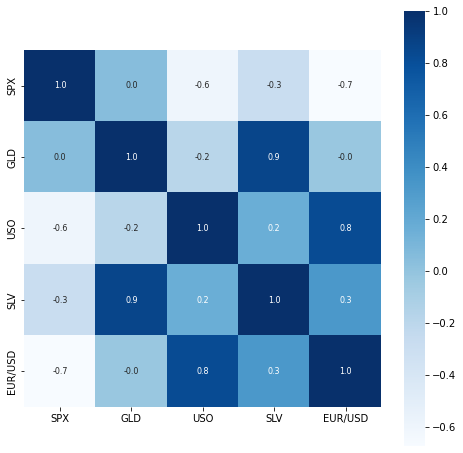

In [ ]:
#constructing heatmap to understand relations in correlations
plt.figure(figsize = (8,8))
sns.heatmap(correlation , cbar=True, square=True ,fmt='.1f' , annot=True,annot_kws={'size':8}, cmap='Blues')

In [ ]:
#correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


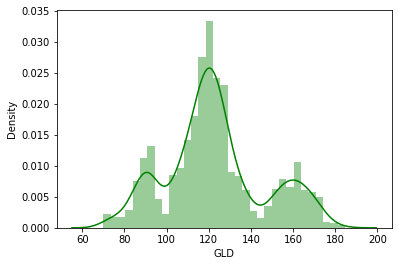

In [ ]:
#checking the distribution of gold price
sns.distplot(gold_data['GLD'],color="green")

In [8]:
#splitting the features and target
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [9]:
#splitting testing and training data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
#model training
regressor = RandomForestRegressor(n_estimators=100)

In [11]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [12]:
#prediction on test data
test_data_predictions =regressor.predict(x_test)

In [13]:
print(test_data_predictions)

[168.52659932  82.16129981 115.94489981 127.61770065 120.77860121
 154.59359801 150.37139915 126.22080051 117.59909881 126.18750016
 116.6384009  172.17040116 141.28559836 167.93049834 115.08419996
 117.62480045 139.52230318 169.947401   158.89150334 160.50069938
 155.0715002  125.27929996 176.90339931 157.50240388 125.12620065
  93.80569948  77.59730014 120.58169997 119.00899908 167.49779967
  88.36070068 125.30619989  91.140001   117.62410042 121.03909922
 136.51840017 115.44640109 115.55670059 148.49389955 107.29570078
 104.17030244  87.13509769 126.43830004 117.78019948 152.7451988
 119.65249988 108.28580013 108.16349834  93.20500054 127.17759736
  74.81120013 113.6370995  121.54710054 111.22179886 118.99049903
 120.96389902 158.71509988 167.33600144 147.29199706  85.85319864
  94.35660031  86.7166988   90.44359982 118.84020079 126.48480087
 127.45229998 169.55530063 122.2498992  117.52539929  98.87150027
 168.59730168 143.22909824 132.30620273 121.24230236 121.35949957
 119.728800

In [14]:
#r squared error
error_score = metrics.r2_score(y_test,test_data_predictions)

In [15]:
print(error_score)

0.9895163263575075


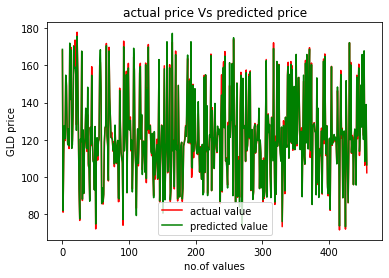

In [ ]:
#visualiing the randomforestregresssion
y_test=list(y_test)
plt.plot(y_test,color='red',label='actual value')
plt.plot(test_data_predictions,color='green',label='predicted value')
plt.title("actual price Vs predicted price")
plt.xlabel('no.of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()